# Machine Learning Model Explainability with LIME

## Getting things prepared and classifying the image

import the appropriate function libraries

In [25]:
#The LIME library which contains all the functions required to produce model explanations
import LIME
#The models library which contains the function to load the model
import ml_models
#To plot the images
import matplotlib.pyplot as plt
#NumPy is also needed
import numpy as np

Create variables which contain the folder paths for the required image and model

In [26]:
#Image Location
image_Location = "FYP/predictImages/Meningioma/m (118).jpg"
#Model Location
model_Location = "FYP/models/VGG16_Model"
#Model Weights Location
model_Weights_Location = "FYP/models/VGG_BEST"
#Image Dimensions
image_Dimensions = (256,256)

Visualise the image which we are going to use for the expriment

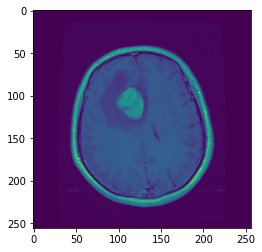

In [27]:
%matplotlib inline
#Assign image to variable
gray_image = LIME.generateGrayImage(image_Location, image_Dimensions) 
#Show the image
plt.imshow(gray_image[0])

Load in the required model and its weights 

In [28]:
#Load Model
model = ml_models.loadModel(model_Location)
#Load Weights
model.load_weights(model_Weights_Location)

Model: FYP/models/VGG16_Model loaded successfully


Use the loaded model to make a prediction on the loaded image, and save the index which is associated with the class.

In [29]:
confidences, predicted_Class = LIME.getImageClass(model, gray_image)

Image Prediction Successfull, Confidences:
[0.0, 0.99987, 0.0, 0.00013]
Predicted Class:
1


In [30]:
class_test = LIME.decodePredictions(predicted_Class)

The Predicted Class is: Meningioma Tumour


## Model explanations using quickshift

With the prediction made, we will start generating the superpixels. The first algorithm we will use is quickshift.

In [63]:
#Define the parameters for the Quickshift segmentation algorithm
kernel_Size = 3
max_Distance = 300
ratio = 0.2

#Additional Parameters
num_Perturbations = 150
kernel_width = 0.25

Number of superpixels generated: 73 
Mask:


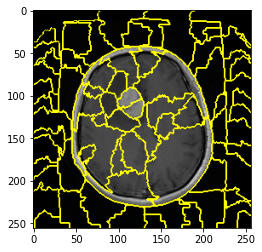

In [64]:
num_superpixels, superpixels = LIME.generateSuperpixels(image_Location, image_Dimensions, kernel_Size, max_Distance, ratio)

Now we create some perturbations of the image and use the loaded model to predict the classes of those perturbations

In [65]:
#Returns the predictions, the perturbated images and the binary perturbation arrays
pert_preds, pert_images, perturbations = LIME.generatePertubations(num_Perturbations, gray_image[0], superpixels, num_superpixels, model)

We can visualise some of the perturbated images

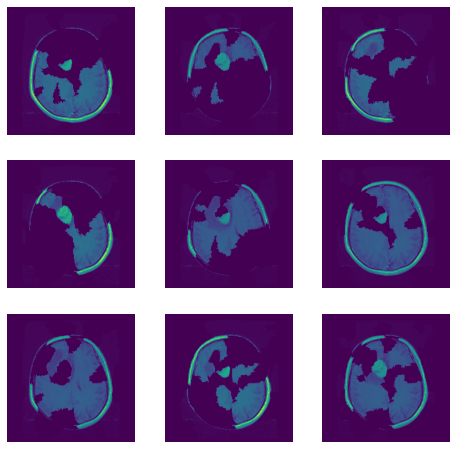

In [66]:
plt.figure(figsize=(8, 8)) 
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pert_images[i].astype(np.float32))
    plt.axis("off")

Now we calculate the distances

In [67]:
distances = LIME.generateDistances(num_superpixels, perturbations)

With the distances generated, we can fit a linear model and generate the coefficients which are associated with the superpixels.

In [68]:
coefficients = LIME.fitLinModel(kernel_width, distances, predicted_Class, pert_preds, perturbations)

In [69]:
print(f'Number of Coefficients {len(coefficients)}, Number of Superpixels {num_superpixels}')

coefficients

Number of Coefficients 73, Number of Superpixels 73


array([-2.63826457e-02, -1.43950473e-02, -1.68562691e-02, -9.59786284e-03,
       -4.72142163e-03,  1.42891750e-02, -4.87564709e-03, -2.86897039e-02,
       -1.97608155e-02, -5.81300946e-03, -2.68112598e-02,  1.86489686e-02,
       -4.66936274e-02,  4.21092426e-04, -1.47940920e-02, -3.26751577e-02,
        4.45933851e-02, -1.86228435e-02,  3.24325557e-02, -7.95326144e-04,
        2.01478144e-02,  1.82513789e-02, -1.73035661e-02, -1.31893653e-02,
        1.67315383e-02, -7.43748118e-02, -5.02233139e-02, -8.30911590e-05,
        2.62327378e-02,  8.19937449e-03, -1.05245148e-02, -3.27683470e-03,
       -7.42233186e-04,  3.62094712e-02,  4.20194634e-02, -2.05394155e-02,
        4.70261798e-02,  1.73624196e-02,  1.40856269e-02,  1.33469762e-02,
        1.05210911e-02,  1.07381317e-02,  1.33293599e-02,  2.49816059e-02,
        1.75618764e-02,  2.06258053e-03,  2.61522937e-02,  1.57940544e-02,
        5.83699852e-02,  5.00908001e-02, -3.09526673e-02, -1.62598801e-02,
       -2.70437949e-03, -

In [70]:
sorted_coeffs = np.argsort(coefficients)

In [71]:
sorted_coeffs

array([25, 53, 26, 12, 15, 50,  7, 10,  0, 55, 56, 35,  8, 58, 17, 22,  2,
       51, 14,  1, 67, 71, 23, 30,  3,  9,  6,  4, 31, 52, 54, 65, 19, 32,
       27, 64, 13, 60, 45, 63, 61, 29, 40, 41, 42, 39, 38,  5, 47, 24, 37,
       44, 21, 11, 20, 62, 69, 72, 70, 57, 43, 46, 28, 59, 66, 18, 68, 33,
       34, 16, 36, 49, 48], dtype=int64)

In [72]:
sorted_coeffs[-10:]

array([59, 66, 18, 68, 33, 34, 16, 36, 49, 48], dtype=int64)

Finally, with the coefficients, we can sort them and display the top 15 superpixels which associate to the predicted class.

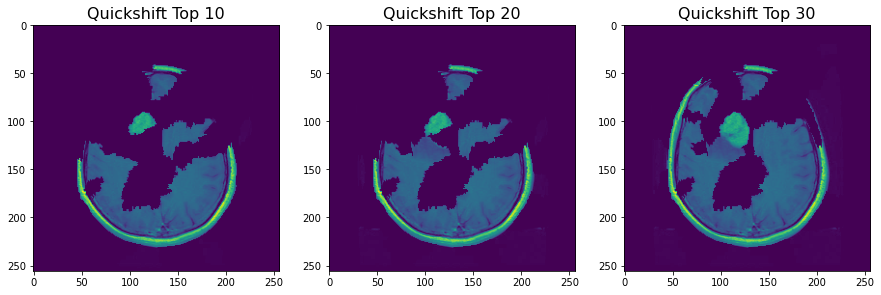

In [73]:
f, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(LIME.showExplanation(10, coefficients, num_superpixels, gray_image[0], superpixels).astype(np.float32))
axarr[1].imshow(LIME.showExplanation(20, coefficients, num_superpixels, gray_image[0], superpixels).astype(np.float32))
axarr[2].imshow(LIME.showExplanation(30, coefficients, num_superpixels, gray_image[0], superpixels).astype(np.float32))
axarr[0].title.set_text('Quickshift Top 10')
axarr[1].title.set_text('Quickshift Top 20')
axarr[2].title.set_text('Quickshift Top 30')
axarr[0].title.set_fontsize(16)
axarr[1].title.set_fontsize(16)
axarr[2].title.set_fontsize(16)

## Model explanations using SLIC

In [43]:
#Some parameters for SLIC
num_Segmentations = 90
sigma = 15

Generate the superpixel mask using the SLIC algorithm

Number of superpixels generated: 75 
Mask:


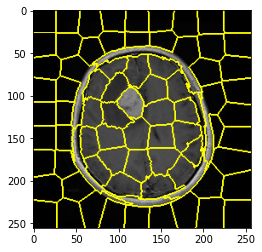

In [45]:
slic_num_superpixels, slic_superpixels = LIME.generateSuperpixelsSLIC(image_Location, image_Dimensions, num_Segmentations, sigma)

Create some perturbations and use the model to predict the class of those new images

In [52]:
pert_preds, pert_images, perturbations = LIME.generatePertubations(num_Perturbations, gray_image[0], slic_superpixels, slic_num_superpixels, model)

Let's visualise some of the SLIC perturbated images

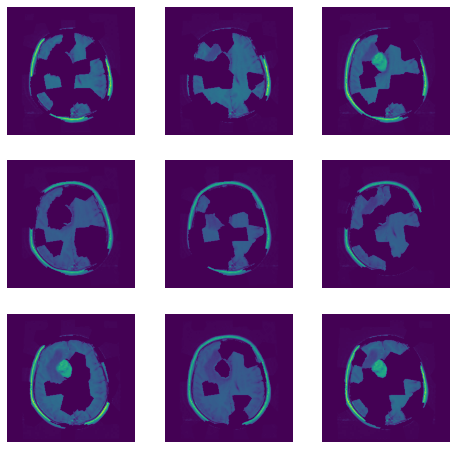

In [53]:
plt.figure(figsize=(8, 8)) 
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pert_images[i].astype(np.float32))
    plt.axis("off")

Again, with the perturbed images and the predictions, we can generate the distanced between those and the true classification

In [59]:
distances = LIME.generateDistances(slic_num_superpixels, perturbations)

With the distances, we can fit the model and retrieve the coefficients

In [60]:
coefficients = LIME.fitLinModel(kernel_width, distances, predicted_Class, pert_preds, perturbations)

And finally, we can use these generated coefficients which are associated with the superpixels to view the explained image.

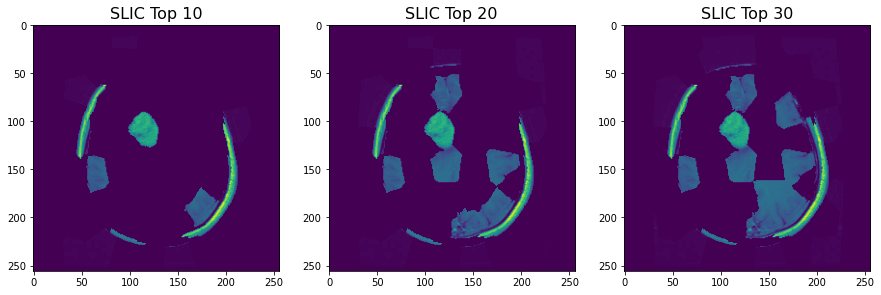

In [61]:
f, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(LIME.showExplanation(10, coefficients, slic_num_superpixels, gray_image[0], slic_superpixels).astype(np.float32))
axarr[1].imshow(LIME.showExplanation(20, coefficients, slic_num_superpixels, gray_image[0], slic_superpixels).astype(np.float32))
axarr[2].imshow(LIME.showExplanation(30, coefficients, slic_num_superpixels, gray_image[0], slic_superpixels).astype(np.float32))
axarr[0].title.set_text('SLIC Top 10')
axarr[1].title.set_text('SLIC Top 20')
axarr[2].title.set_text('SLIC Top 30')
axarr[0].title.set_fontsize(16)
axarr[1].title.set_fontsize(16)
axarr[2].title.set_fontsize(16)